500


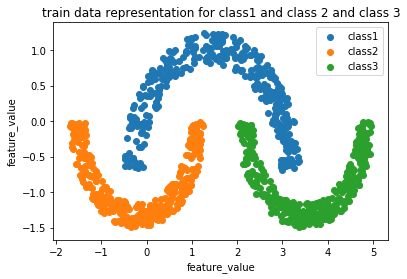

case 1 result
Test result by taking test-data from class1 
class1: 93
class2: 37
class3: 20
Test result by taking test-data from class2
class1: 40
class2: 110
class3: 0
Test result by taking test-data from class3
class1: 24
class2: 0
class3: 126
Accuracy:  73.11111111111111
Averageprecision 0.7345565687520391
Average recall:  0.7311111111111112
Average Fscore 0.7328297901805578
Case 2 result
Test result by taking data from class1 
class1: 117
class2: 19
class3: 14
Test result by taking data from class2 
class1: 15
class2: 135
class3: 0
Test result by taking data from class3 
class1: 6
class2: 0
class3: 144
Accuracy:  88.0
Averageprecision 0.8786139562143965
Average recall:  0.88
Average Fscore 0.8793064319050687
case 3 result
Test result by taking data from class1 
class1: 118
class2: 18
class3: 14
Test result by taking data from class2 
class1: 33
class2: 117
class3: 0
Test result by taking data from class3 
class1: 16
class2: 0
class3: 134
Accuracy:  82.0
Averageprecision 0.826219632

In [2]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
def datamodification(datafile):
    f=datafile
    lst=[]
    for l in f:
        lst.append(l)
    #print(lst)       
    #newlst=[d[:-1] for d in lst] #removing of last character from each strings i.e'\n'
    #print(newlst)
    lstf=[]
    for p in lst:
        lst2=p.split()
        for k in range(len(lst2)):
            lst2[k]=float(lst2[k])  #storing 
        lstf.append(tuple(lst2))
    return lstf 

#generation list of trainee data and testdata and their plot representataion
def datasplit(datafile,total,ratio):
    data=datafile
    l=int(ratio*total) #trainedata
    traindata=[]
    testdata=[]
#list of traindata
    k=0
    while k<l:
        element=random.choice(data)
        if element not in traindata:
            traindata.append(element)
        k=len(traindata)
    testdata=set(data).symmetric_difference(set(traindata))
    return traindata,testdata

def scatterplot(traindata1,traindata2,traindata3):
    data1=traindata1
    data2=traindata2
    data3=traindata3
    xpoint1=[]
    ypoint1=[]
    for point in data1:
        xpoint1.append(point[0])
        ypoint1.append(point[1])
    plt.scatter(xpoint1,ypoint1,label='class1')
    xpoint2=[]
    ypoint2=[]
    for point in data2:
        xpoint2.append(point[0])
        ypoint2.append(point[1])
    plt.scatter(xpoint2,ypoint2,label='class2')
    xpoint3=[]
    ypoint3=[]
    for point in data3:
        xpoint3.append(point[0])
        ypoint3.append(point[1])
    plt.scatter(xpoint3,ypoint3,label='class3')
    plt.xlabel("feature_value")
    plt.ylabel("feature_value")
    plt.title("train data representation for class1 and class 2 and class 3")
    plt.legend()
    plt.show()
    return -1

#mean and co-variance estimation of each class 
def par_estimation(traindata1,traindata2,traindata3):
    data=[traindata1,traindata2,traindata3]
    mean=[]
    variance=[]
    for d in data:
        l=len(d)
        x=np.array(d)
        variance.append(np.cov(x.transpose()))
        mean.append((np.sum(x,axis=0))/l)
    return variance,mean   
        
#case:1 having diagonal matrix having same variance for  each class
def avr_parameter(cov1,cov2,cov3):
    z1=cov1
    z2=cov2
    z3=cov3
    z=cov1+cov2+cov3
    z=z/3   
    pivot=(z[0][0]+z[1][1])/2
    z[0][0]=pivot
    z[1][1]=pivot
    cov_dig=z*(np.identity(2))
    return cov_dig,pivot

#case 1
def decision1(data,mean1,mean2,mean3,variance):
    temp=variance
    count1=0
    count2=0
    count3=0
    lst=data
    for p in lst:
        r=np.array([p]) 
        x1=np.dot(mean1,r.transpose())
        x2=np.dot(mean1,mean1.transpose())
        x3=x2/2
        x4=x1-x3
        x5=x4/temp
        x6=math.log(.25)
        d1=x5+x6
        y1=np.dot(mean2,r.transpose())
        y2=np.dot(mean2,mean2.transpose())
        y3=y2/2
        y4=y1-y3
        y5=y4/temp
        y6=math.log(.25)
        d2=y5+y6
        z1=np.dot(mean3,r.transpose())
        z2=np.dot(mean3,mean3.transpose())
        z3=z2/2
        z4=z1-z3
        z5=z4/temp
        z6=math.log(.25)
        d3=z5+z6
        lst1=[d1,d2,d3]
        value=max(lst1)
        if lst1[0]==value:
            count1=count1+1
        elif lst1[1]==value:
            count2=count2+1
        else:
            count3=count3+1
    return count1,count2,count3 

#case2 same covariance matrix
def decision2(data,cov,mean1,mean2,mean3):
    count1=0
    count2=0
    count3=0
    lst=data
    incov=np.linalg.inv(cov)      #inverse of covariance matrix
    cov4=incov.transpose()
    for p in lst:
        #class1
        x1=np.dot(p,cov4)
        x2=np.dot(x1,mean1.transpose())
        #-------
        x3=np.dot(mean1,cov4)
        x4=np.dot(x3,mean1.transpose())
        x4=x4/2
        x5=math.log(.25)
        #-------
        c1=x2-x4+x5
        #class2
        y1=np.dot(p,cov4)
        y2=np.dot(y1,mean2.transpose())
        #-------
        y3=np.dot(mean2,cov4)
        y4=np.dot(y3,mean2.transpose())
        y4=y4/2
        y5=math.log(.25)
        #-------
        c2=y2-y4+y5
        #class3
        z1=np.dot(p,cov4)
        z2=np.dot(z1,mean3.transpose())
        #-------
        z3=np.dot(mean3,cov4)
        z4=np.dot(z3,mean3.transpose())
        z4=z4/2
        z5=math.log(.50)
        #-------
        c3=z2-z4+z5
        lst1=[c1,c2,c3]
        value=max(lst1)
        if lst1[0]==value:
            count1=count1+1
        elif lst1[1]==value:
            count2=count2+1
        else:
            count3=count3+1
    return count1,count2,count3
    
#case3 different covariance matrix
def decision3(data,cov1,cov2,cov3,mean1,mean2,mean3):
    count1=0
    count2=0
    count3=0
    lst=data
    #---------
    incov1=np.linalg.inv(cov1)      #inverse of covariance matrix of classs 1
    cov4=incov1.transpose()
    #---------
    incov2=np.linalg.inv(cov2)      #inverse of covariance matrix of class 2
    cov5=incov2.transpose()
    #----------
    incov3=np.linalg.inv(cov3)      #inverse of covariance matrix of class 3
    cov6=incov3.transpose()
    #---------
    for p in lst:
        #class1
        x1=np.dot(p,cov4)
        r=np.array([p])
        x2=r.transpose()
        x3=np.dot(x1,x2)
        #-------
        x4=np.dot(mean1,cov4)
        x5=np.dot(x4,x2)
        x5=2*x5
        #--------
        x6=np.dot(mean1,cov4)
        x7=np.dot(x6,mean1.transpose())
        #-------
        x8=np.linalg.det(cov4)
        x9=math.log(abs(x8))
        c1=x3-x5+x7+x9
        c1=c1/2
        C1=math.log(.25)-c1        
        #class2-------------------------------------class2
        y1=np.dot(p,cov5)
        r=np.array([p])
        y2=r.transpose()
        y3=np.dot(y1,y2)
        #-------
        y4=np.dot(mean2,cov5)
        y5=np.dot(y4,y2)
        y5=2*y5
        #--------
        y6=np.dot(mean2,cov5)
        y7=np.dot(y6,mean2.transpose())
        #-------
        y8=np.linalg.det(cov5)
        y9=math.log(abs(y8))
        c2=y3-y5+y7+y9
        c2=c2/2
        C2=math.log(.25)-c2
         #class3-------------------------------------
        z1=np.dot(p,cov6)
        r=np.array([p])
        z2=r.transpose()
        z3=np.dot(z1,z2)
        #-------
        z4=np.dot(mean3,cov6)
        z5=np.dot(z4,z2)
        z5=2*z5
        #--------
        z6=np.dot(mean3,cov6)
        z7=np.dot(z6,mean3.transpose())
        #-------
        z8=np.linalg.det(cov6)
        z9=math.log(abs(z8))
        c3=z3-z5+z7+z9
        c3=c3/2
        C3=math.log(.5)-c3
        #-------
        lst1=[C1,C2,C3]
        value=max(lst1)
        if lst1[0]==value:
            count1=count1+1
        elif lst1[1]==value:
            count2=count2+1
        else:
            count3=count3+1
    return count1,count2,count3
        
        
        
                
        

                

    
   
    
    
    

    
    
    
    
#class 1
f1=open(r'./data2/c1_b16.txt')
lstf1=datamodification(f1)
print(len(lstf1))
traindata1,testdata1=datasplit(lstf1,500,.7)
#print(testdata1)
#----------------------------------
#class2
f2=open(r'./data2/c2_b16.txt')
lstf2=datamodification(f2)
traindata2,testdata2=datasplit(lstf2,500,.7)
#-------------------------------
#class3
f3=open(r'./data2/c3_b16.txt')
lstf3=datamodification(f3)
traindata3,testdata3=datasplit(lstf3,500,.7)
#-----------------------------
#calling of function to plot data for each class
traindata_plot=scatterplot(traindata1,traindata2,traindata3)
#-----------------------------
#calling of function to find mean and variance of each class
cov_matrix,mean_vector=par_estimation(traindata1,traindata2,traindata3)
lst_mean=[]
lst_cov=[]
for d in cov_matrix:
    lst_cov.append(d)
for p in mean_vector:
    lst_mean.append(p)
mean1=lst_mean[0]
mean2=lst_mean[1]
mean3=lst_mean[2]
#print(mean1[1])
#print(lst_cov[0])    
#print("The lst of covariance matrix: ",lst_cov)    
#print("The lst of mean_vector: ",lst_mean)
#------------------------------
#covariance matrix having same variance
cov1=lst_cov[0]
cov2=lst_cov[1]
cov3=lst_cov[2]
cov_matrix,variance=avr_parameter(cov1,cov2,cov3)
value=variance
#print(cov_matrix)
#-----------------------------------
#case1
#-----------------------------------
#class1
print("case 1 result")
x,y,z=decision1(testdata1,mean1,mean2,mean3,value)
print("Test result by taking test-data from class1 ")
print("class1:",x)
print("class2:",y)
print("class3:",z)
c11,c12,c13=x,y,z
#class2
x1,y1,z1=decision1(testdata2,mean1,mean2,mean3,variance)
print("Test result by taking test-data from class2")
print("class1:",x1)
print("class2:",y1)
print("class3:",z1)
c21,c22,c23=x1,y1,z1
#class3
x2,y2,z2=decision1(testdata3,mean1,mean2,mean3,variance)
print("Test result by taking test-data from class3")
print("class1:",x2)
print("class2:",y2)
print("class3:",z2)
c31,c32,c33=x2,y2,z2
accuracy=((c11+c22+c33)/450)*100
print("Accuracy: ",accuracy)
prec1=c11/(c11+c21+c31)
prec2=c22/(c12+c22+c32)
prec3=c33/(c13+c23+c33)
meanprec=(prec1+prec2+prec3)/3
print("Averageprecision",meanprec)
recal1=c11/(c11+c12+c13)
recal2=c22/(c21+c22+c23)
recal3=c33/(c31+c32+c33)
meanrecal=(recal1+recal2+recal3)/3
print("Average recall: ",meanrecal)
fscore=(2*(meanprec*meanrecal))/(meanprec+meanrecal)
print("Average Fscore",fscore)
#case2
print("Case 2 result")
#-------------------------------
cov=(cov1+cov2+cov3)/3
#class1
x3,y3,z3=decision2(testdata1,cov,mean1,mean2,mean3)
print("Test result by taking data from class1 ")
print("class1:",x3)
print("class2:",y3)
print("class3:",z3)
c11,c12,c13=x3,y3,z3
#class2
x4,y4,z4=decision2(testdata2,cov,mean1,mean2,mean3)
print("Test result by taking data from class2 ")
print("class1:",x4)
print("class2:",y4)
print("class3:",z4)
c21,c22,c23=x4,y4,z4
#class3
x5,y5,z5=decision2(testdata3,cov,mean1,mean2,mean3)
print("Test result by taking data from class3 ")
print("class1:",x5)
print("class2:",y5)
print("class3:",z5)
c31,c32,c33=x5,y5,z5
accuracy=((c11+c22+c33)/450)*100
print("Accuracy: ",accuracy)
prec1=c11/(c11+c21+c31)
prec2=c22/(c12+c22+c32)
prec3=c33/(c13+c23+c33)
meanprec=(prec1+prec2+prec3)/3
print("Averageprecision",meanprec)
recal1=c11/(c11+c12+c13)
recal2=c22/(c21+c22+c23)
recal3=c33/(c31+c32+c33)
meanrecal=(recal1+recal2+recal3)/3
print("Average recall: ",meanrecal)
fscore=(2*(meanprec*meanrecal))/(meanprec+meanrecal)
print("Average Fscore",fscore)
#--------------------------------
#case3
print("case 3 result")
#class1
x6,y6,z6=decision3(testdata1,cov1,cov2,cov3,mean1,mean2,mean3)
print("Test result by taking data from class1 ")
print("class1:",x6)
print("class2:",y6)
print("class3:",z6)
c11,c12,c13=x6,y6,z6
#class2
x7,y7,z7=decision3(testdata2,cov1,cov2,cov3,mean1,mean2,mean3)
print("Test result by taking data from class2 ")
print("class1:",x7)
print("class2:",y7)
print("class3:",z7)
c21,c22,c23=x7,y7,z7
#class3
x8,y8,z8=decision3(testdata3,cov1,cov2,cov3,mean1,mean2,mean3)
print("Test result by taking data from class3 ")
print("class1:",x8)
print("class2:",y8)
print("class3:",z8)
c31,c32,c33=x8,y8,z8
accuracy=((c11+c22+c33)/450)*100
print("Accuracy: ",accuracy)
prec1=c11/(c11+c21+c31)
prec2=c22/(c12+c22+c32)
prec3=c33/(c13+c23+c33)
meanprec=(prec1+prec2+prec3)/3
print("Averageprecision",meanprec)
recal1=c11/(c11+c12+c13)
recal2=c22/(c21+c22+c23)
recal3=c33/(c31+c32+c33)
meanrecal=(recal1+recal2+recal3)/3
print("Average recall: ",meanrecal)
fscore=(2*(meanprec*meanrecal))/(meanprec+meanrecal)
print("Average Fscore",fscore)